Install the k8s-env-discrete-state-discrete-action-V0 gym environment

In [43]:
!pip3 install -e ../../gym-k8s

Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///home/eleni/PythonProjects/k8s-RL-autoscaler/gym-k8s
  Attempting uninstall: gym-k8s
    Found existing installation: gym-k8s 0.0.2
    Uninstalling gym-k8s-0.0.2:
      Successfully uninstalled gym-k8s-0.0.2
  Running setup.py develop for gym-k8s
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [44]:
import gym
env = gym.make('gym_k8s:k8s-env-discrete-state-discrete-action-v1', app_name='hello-python', sla_latency = 0.2, prometheus_host = 'http://localhost:9091/',  prometheus_latency_metric_name = "avg(haproxy_backend_response_time_average_seconds{proxy='default_hello-python_5000'})")
observation = env.reset()

Exception when calling AutoscalingV2beta2Api->read_namespaced_horizontal_pod_autoscaler:
ob_baseline
[0, 0, 100.0, 0.0]
----CURRENT STATE---
[1, 1, 6, 1]


In [45]:
action = env.action_space.sample()
action

0

In [46]:
env.step(7) #scale both cpu and memory

Exception when calling AutoscalingV2beta2Api->read_namespaced_horizontal_pod_autoscaler:
new namespaced_horizontal_pod_autoscaler is created


KeyboardInterrupt: 

In [47]:
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

Action Space Discrete(9)
State Space Discrete(875)


In [48]:
import numpy as np
from numpy import asarray
from numpy import save
#q_table =np.full((env.observation_space.n, env.action_space.n), 50)
#q_table = np.zeros([env.observation_space.n, env.action_space.n])
#save('Q-k8s-env-discrete-state-discrete-action-V0-data.npy', asarray(q_table))

create and save the qtable

In [49]:
# load numpy array from npy file
from numpy import load
# load array
q_table = load('Q-k8s-env-discrete-state-discrete-action-V0-data.npy')
# print the array
print(q_table)

[[50 50 50 ... 50 50 50]
 [50 50 50 ... 50 50 50]
 [50 50 50 ... 50 50 50]
 ...
 [50 50 50 ... 50 50 50]
 [50 50 50 ... 50 50 50]
 [50 50 50 ... 50 50 50]]


In [50]:
env.P[588]

{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: []}

create and save the training results files

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
'''
training_results = {'timesteps': [],
        'penalties': []
        }
average_reward_results = {'timesteps': [],
        'average_reward': []
        }
df_80 = pd.DataFrame(training_results, columns = ['timesteps', 'penalties'])
df_60 = pd.DataFrame(training_results, columns = ['timesteps', 'penalties'])
df_40 = pd.DataFrame(training_results, columns = ['timesteps', 'penalties'])
df_20 = pd.DataFrame(training_results, columns = ['timesteps', 'penalties'])
df_average_reward = pd.DataFrame(average_reward_results, columns = ['timesteps', 'average_reward'])


df_80.to_csv ('export_dataframe_80.csv', index = False, header=True)
df_60.to_csv ('export_dataframe_60.csv', index = False, header=True)
df_40.to_csv ('export_dataframe_40.csv', index = False, header=True)
df_20.to_csv ('export_dataframe_20.csv', index = False, header=True)
df_average_reward.to_csv ('average_reward.csv', index = False, header=True)


# gca stands for 'get current axis'
ax = plt.gca()

df_80.plot(kind='line',x='timesteps',y='penalties',ax=ax)
plt.show()'''

"\ntraining_results = {'timesteps': [],\n        'penalties': []\n        }\naverage_reward_results = {'timesteps': [],\n        'average_reward': []\n        }\ndf_80 = pd.DataFrame(training_results, columns = ['timesteps', 'penalties'])\ndf_60 = pd.DataFrame(training_results, columns = ['timesteps', 'penalties'])\ndf_40 = pd.DataFrame(training_results, columns = ['timesteps', 'penalties'])\ndf_20 = pd.DataFrame(training_results, columns = ['timesteps', 'penalties'])\ndf_average_reward = pd.DataFrame(average_reward_results, columns = ['timesteps', 'average_reward'])\n\n\ndf_80.to_csv ('export_dataframe_80.csv', index = False, header=True)\ndf_60.to_csv ('export_dataframe_60.csv', index = False, header=True)\ndf_40.to_csv ('export_dataframe_40.csv', index = False, header=True)\ndf_20.to_csv ('export_dataframe_20.csv', index = False, header=True)\ndf_average_reward.to_csv ('average_reward.csv', index = False, header=True)\n\n\n# gca stands for 'get current axis'\nax = plt.gca()\n\ndf_80

In [52]:
#load dataframes
df_80 = pd.read_csv("export_dataframe_80.csv") 
df_60 = pd.read_csv("export_dataframe_60.csv") 
df_40 = pd.read_csv("export_dataframe_40.csv") 
df_20 = pd.read_csv("export_dataframe_20.csv") 
df_average_reward = pd.read_csv("average_reward.csv") 
# Preview the first 5 lines of the loaded data 
df_average_reward.head()

timesteps  average_reward
0        1.0       44.824022
1        0.0      100.000000
2        0.0      100.000000
3        0.0      100.000000
4        0.0      100.000000

Training the agent

In [18]:
%%time
"""Training the agent"""

import random
from IPython.display import clear_output


# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.3


#for i in range(1, 100001):
for i in range(1, 2):
    state = env.reset()
    print(state)

    epochs, penalties_80,penalties_60,penalties_40,penalties_20, reward, total_reward, = 0, 0, 0, 0, 0, 0, 0
    done = False
    
    
    for x in range(2):
        if not done:
                
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample() # Explore action space, non-greedy (NG) action selection 
            else:
                action = np.argmax(q_table[state]) # Exploit learned values, greedy (G) action selection

            next_state, reward, done, info = env.step(action)
            
            mytuple = next_state, reward, done, info
            
            ####save historical tuple###
            with open('k8s_historical_states_discrete.csv', 'a') as f:
                f.write(','.join(str(s) for s in mytuple)+','+str(action))
                f.write('\n')
                f.close()
            ###END of save historical tuple###

        
            old_value = q_table[state, action]
            print('old_value')
            print(old_value)
            
            print('q_table[next_state]')
            print(q_table[next_state])
            
            next_max = np.max(q_table[next_state]) # q-table update is always greedy (np.max). q-learning is off-police since the action taken can be of different policy (non-greedy, random) (NG)
        
            print(next_max)
            print('next_max')
            
            new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
            
            print('new_value')
            print(new_value)
            
            q_table[state, action] = new_value
            print('q_table[state, action]')
            print(q_table[state, action])
            save('Q-k8s-env-discrete-state-discrete-action-V0-data.npy', asarray(q_table))

            print('next_state, reward, action')
            print(next_state, reward, action)
            
            total_reward += reward
            
            if reward <= 80:
                 penalties_80 += 1
                 
            if reward <= 60 :
                 penalties_60 += 1
                 
            if reward <= 40 :
                 penalties_40 += 1  
                 
            if reward <= 20 :
                 penalties_20 += 1
                 
                 
            state = next_state
            epochs += 1
             
                 
    average_reward  = total_reward/2
    print("Timesteps taken: {}".format(i))
    print("Penalties_40 incurred: {}".format(penalties_40))
    print("average_reward: {}".format(average_reward))
    df_80 = pd.read_csv("export_dataframe_80.csv")
    new_row_80 = {'timesteps':i, 'penalties':penalties_80}
    df_80 = df_80.append(new_row_80, ignore_index=True)
    df_80.to_csv ('export_dataframe_80.csv', index = False, header=True)

    df_60 = pd.read_csv("export_dataframe_60.csv")
    new_row_60 = {'timesteps':i, 'penalties':penalties_60}
    df_60 = df_60.append(new_row_60, ignore_index=True)
    df_60.to_csv ('export_dataframe_60.csv', index = False, header=True)

    df_40 = pd.read_csv("export_dataframe_40.csv")                 
    new_row_40 = {'timesteps':i, 'penalties':penalties_40}
    df_40 = df_40.append(new_row_40, ignore_index=True)
    df_40.to_csv ('export_dataframe_40.csv', index = False, header=True)

    df_20 = pd.read_csv("export_dataframe_20.csv")                 
    new_row_20 = {'timesteps':i, 'penalties':penalties_20}
    df_20 = df_20.append(new_row_20, ignore_index=True)
    df_20.to_csv ('export_dataframe_20.csv', index = False, header=True)
    
    df_average_reward = pd.read_csv("average_reward.csv")                 
    new_row_average_reward = {'timesteps':i, 'average_reward':average_reward}
    df_average_reward = df_average_reward.append(new_row_average_reward, ignore_index=True)
    df_average_reward.to_csv ('average_reward.csv', index = False, header=True)
                     

print("Training finished.\n")


ob_baseline
[1, 24, 20.0, 117.0]
----CURRENT STATE---
[1, 2, 2, 6]
265
new namespaced_horizontal_pod_autoscaler is created
ob_baseline
[1, 24, 20.0, 117.0]
----CURRENT STATE---
[1, 2, 2, 6]
old_value
0.0
q_table[next_state]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.0
next_max
new_value
4.482402175175201
q_table[state, action]
4.482402175175201
next_state, reward, action
265 44.82402175175201 0
new namespaced_horizontal_pod_autoscaler is created
ob_baseline
[1, 21, 30.0, 117.0]
----CURRENT STATE---
[1, 2, 2, 6]
old_value
4.482402175175201
q_table[next_state]
[4.48240218 0.         0.         0.         0.         0.
 0.         0.         0.        ]
4.482402175175201
next_max
new_value
8.785508263343395
q_table[state, action]
8.785508263343395
next_state, reward, action
265 44.82402175175201 0
Timesteps taken: 1
Penalties_40 incurred: 0
average_reward: 44.82402175175201
Training finished.

CPU times: user 172 ms, sys: 13.7 ms, total: 186 ms
Wall time: 10min


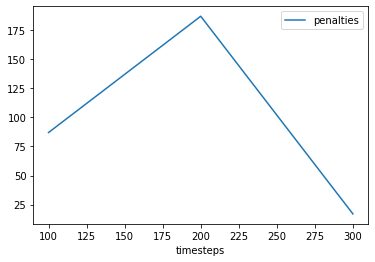

In [48]:
'''import matplotlib.pyplot as plt
import pandas as pd
training_results = {'timesteps': [],
        'penalties': []
        }
df = pd.DataFrame(training_results, columns = ['timesteps', 'penalties'])

new_row = {'timesteps':100, 'penalties':87}
new_row1 = {'timesteps':200, 'penalties':187}
new_row2 = {'timesteps':300, 'penalties':17}
#append row to the dataframe
df = df.append(new_row, ignore_index=True)
df = df.append(new_row1, ignore_index=True)
df = df.append(new_row2, ignore_index=True)
df = df.append(new_row2, ignore_index=True)

# gca stands for 'get current axis'
ax = plt.gca()

df.plot(kind='line',x='timesteps',y='penalties',ax=ax)
plt.show()

df.to_csv ('export_dataframe.csv', index = False, header=True)
'''

Separete execution in batches of 2 hours = 120 minutes

30 minutes the services are not stressed at all , 30 minutes are stressed in a basic way , 30 minutes a cpu intensive function is stressed, 30 minutes a memory intensive function is stressed.

since every action needs ~8 minutes to get enforced we have 15 samples every 2 hours for each service

deploy 67 services of hello-python

For each epoch we have 15 * 67  ~ 1000 timesteps

This function deploys a new services in k8s

In [53]:
import subprocess
def deploy_service(num_service):
    #create new manifest
    fin = open("hello_python_app_deployment_files/deployment-hello-python.yaml", "rt")
    #output file to write the result to
    fout = open("hello_python_app_deployment_files/deployment-hello-python"+str(num_service)+".yaml", "wt")
    #for each line in the input file
    for line in fin:
        #read replace the string and write to output file
        fout.write(line.replace('name_to_replace', 'hello-python'+str(num_service)))
    #close input and output files
    fin.close()
    fout.close()

    #deploy service
    msg1 = subprocess.getoutput('kubectl create -f hello_python_app_deployment_files/deployment-hello-python'+str(num_service)+'.yaml')
    print(msg1)

In [69]:
def delete_service(num_service):
    #deploy service
    msg1 = subprocess.getoutput('kubectl delete -n default deployment hello-python'+str(num_service))
    print(msg1)
    msg2 = subprocess.getoutput('kubectl delete -n default service hello-python'+str(num_service))
    print(msg2)
    
def delete_hpa(num_service):
    #deploy service
    msg1 = subprocess.getoutput('kubectl delete hpa hello-python'+str(num_service))
    print(msg1)

delete_service(0)
delete_service(1)

Error from server (NotFound): deployments.apps "hello-python0" not found
Error from server (NotFound): services "hello-python0" not found
Error from server (NotFound): deployments.apps "hello-python1" not found
Error from server (NotFound): services "hello-python1" not found


This function update the ingress controller for the new services

In [55]:
def update_ingress(num_of_ingresses):
    # copy baseline file
    with open('hello_python_app_deployment_files/ingress.yaml','r') as firstfile, open('hello_python_app_deployment_files/ingress'+str(num_of_ingresses)+'.yaml','a') as secondfile:  
        for line in firstfile:
            secondfile.write(line)
    
    file1 = open('hello_python_app_deployment_files/ingress'+str(num_of_ingresses)+'.yaml', "a")  # 
    for i in range(num_of_ingresses):
        file1.write('      - backend:\n')
        file1.write('          serviceName: hello-python'+str(i)+' \n')
        file1.write('          servicePort: 5000\n')
        file1.write('        path: /hello-python'+str(i)+'\n')
    file1.close()
    #deploy ingress
    msg1 = subprocess.getoutput('kubectl apply -f hello_python_app_deployment_files/ingress'+str(num_of_ingresses)+'.yaml')
    print(msg1)

In [56]:
#update_ingress(2)    

In [66]:
import random
from IPython.display import clear_output


def train_agent(num_service):
    %%time
    """Training the agent"""
    # Hyperparameters
    alpha = 0.1
    gamma = 0.6
    epsilon = 0.3
    app_name = 'hello-python' + str(num_service)
    prometheus_latency_metric_name = "avg(haproxy_backend_response_time_average_seconds{proxy='default_hello-python_5000'})"
    prometheus_latency_metric_name = prometheus_latency_metric_name.replace("hello-python", app_name)
    env = gym.make('gym_k8s:k8s-env-discrete-state-discrete-action-v1', app_name=app_name, sla_latency = 0.2, prometheus_host = 'http://localhost:9091/',  prometheus_latency_metric_name = prometheus_latency_metric_name)
    #for i in range(1, 100001):
    for i in range(2):
        state = env.reset()
        print(state)

        epochs, reward, total_reward, = 0, 0, 0
        done = False
    
    
        for x in range(2):
            if not done:
                
                if random.uniform(0, 1) < epsilon:
                    action = env.action_space.sample() # Explore action space, non-greedy (NG) action selection 
                else:
                    action = np.argmax(q_table[state]) # Exploit learned values, greedy (G) action selection

                print('app: '+app_name , 'action:' + str(action))
                next_state, reward, done, info = env.step(action)            
                mytuple = next_state, reward, done, info
            
                ####save historical tuple###
                with open('k8s_historical_states_discrete.csv', 'a') as f:
                    f.write(','.join(str(s) for s in mytuple)+','+str(action))
                    f.write('\n')
                    f.close()

        
                old_value = q_table[state, action]
                next_max = np.max(q_table[next_state]) # q-table update is always greedy (np.max). q-learning is off-police since the action taken can be of different policy (non-greedy, random) (NG)
                new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
                q_table[state, action] = new_value
                print('app: '+app_name , 'state: '+ str(state), 'action:' + str(action), 'new_value: ' +str(new_value) , 'next_state: ' + str(next_state), 'reward: '+ str(reward))
                save('Q-k8s-env-discrete-state-discrete-action-V0-data.npy', asarray(q_table))
                total_reward += reward  
                state = next_state
                epochs += 1
             
                 
        average_reward  = total_reward/2
        print("Timesteps taken: {}".format(i))
        print("average_reward: {}".format(average_reward))
        df_average_reward = pd.read_csv("average_reward.csv")                 
        new_row_average_reward = {'timesteps':i, 'average_reward':average_reward}
        df_average_reward = df_average_reward.append(new_row_average_reward, ignore_index=True)
        df_average_reward.to_csv ('average_reward.csv', index = False, header=True)            

        print("Training finished.\n")


In [62]:
train_agent(0)

hi
CPU times: user 6 µs, sys: 1 µs, total: 7 µs
Wall time: 13.6 µs
ob_baseline
[1, 0, 100.0, 0.0]
----CURRENT STATE---
[1, 1, 6, 1]
253
app: hello-python0 action:0
new namespaced_horizontal_pod_autoscaler is created


KeyboardInterrupt: 

In [64]:
from multiprocessing import Process, Queue
import random

queue = Queue()

num_of_ingresses = 2
update_ingress(num_of_ingresses)
processes = [Process(target=deploy_service(x)) for x in range(64)]

for p in processes:
    p.start()

for p in processes:
    p.join()


ingress.networking.k8s.io/echoserver configured
Error from server (AlreadyExists): error when creating "hello_python_app_deployment_files/deployment-hello-python0.yaml": deployments.apps "hello-python0" already exists
Error from server (AlreadyExists): error when creating "hello_python_app_deployment_files/deployment-hello-python0.yaml": services "hello-python0" already exists
Error from server (AlreadyExists): error when creating "hello_python_app_deployment_files/deployment-hello-python1.yaml": deployments.apps "hello-python1" already exists
Error from server (AlreadyExists): error when creating "hello_python_app_deployment_files/deployment-hello-python1.yaml": services "hello-python1" already exists
deployment.apps/hello-python2 created
service/hello-python2 created
deployment.apps/hello-python3 created
service/hello-python3 created
deployment.apps/hello-python4 created
service/hello-python4 created
deployment.apps/hello-python5 created
service/hello-python5 created
deployment.apps/

Exception in thread Thread-22:
Traceback (most recent call last):
  File "/usr/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-61-4620c3b62e48>", line 49, in train_agent
    print('app: '+app_name , 'state: '+ str(state), 'action:' + str(action), 'new_value: ' +str(new_value) , 'next_state: ' + next_state, 'reward: '+ reward)
TypeError: must be str, not int



ob_baseline
[0, 16, 40.0, 0.0]
----CURRENT STATE---
[1, 1, 3, 1]


Exception in thread Thread-21:
Traceback (most recent call last):
  File "/usr/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-23-ca81ee1cb185>", line 47, in train_agent
    print('app: '+app_name , 'state: '+ str(state), 'action:' + str(action), 'new_value: ' +str(new_value) , 'next_state: ' + next_state, 'reward: '+ reward)
TypeError: must be str, not int



In [68]:
queue = Queue()

num_of_ingresses = 2
update_ingress(num_of_ingresses)
processes = [Process(target=delete_service(x)) for x in range(64)]

for p in processes:
    p.start()

for p in processes:
    p.join()

ingress.networking.k8s.io/echoserver configured
deployment.apps "hello-python0" deleted
service "hello-python0" deleted
deployment.apps "hello-python1" deleted
service "hello-python1" deleted
deployment.apps "hello-python2" deleted
service "hello-python2" deleted
deployment.apps "hello-python3" deleted
service "hello-python3" deleted
deployment.apps "hello-python4" deleted
service "hello-python4" deleted
deployment.apps "hello-python5" deleted
service "hello-python5" deleted
deployment.apps "hello-python6" deleted
service "hello-python6" deleted
deployment.apps "hello-python7" deleted
service "hello-python7" deleted
deployment.apps "hello-python8" deleted
service "hello-python8" deleted
deployment.apps "hello-python9" deleted
service "hello-python9" deleted
deployment.apps "hello-python10" deleted
service "hello-python10" deleted
deployment.apps "hello-python11" deleted
service "hello-python11" deleted
deployment.apps "hello-python12" deleted
service "hello-python12" deleted
deployment

In [70]:
queue = Queue()

num_of_ingresses = 2
update_ingress(num_of_ingresses)
processes = [Process(target=delete_hpa(x)) for x in range(64)]

for p in processes:
    p.start()

for p in processes:
    p.join()

ingress.networking.k8s.io/echoserver configured
horizontalpodautoscaler.autoscaling "hello-python0" deleted
horizontalpodautoscaler.autoscaling "hello-python1" deleted
Error from server (NotFound): horizontalpodautoscalers.autoscaling "hello-python2" not found
horizontalpodautoscaler.autoscaling "hello-python3" deleted
horizontalpodautoscaler.autoscaling "hello-python4" deleted
Error from server (NotFound): horizontalpodautoscalers.autoscaling "hello-python5" not found
horizontalpodautoscaler.autoscaling "hello-python6" deleted
Error from server (NotFound): horizontalpodautoscalers.autoscaling "hello-python7" not found
Error from server (NotFound): horizontalpodautoscalers.autoscaling "hello-python8" not found
horizontalpodautoscaler.autoscaling "hello-python9" deleted
horizontalpodautoscaler.autoscaling "hello-python10" deleted
Error from server (NotFound): horizontalpodautoscalers.autoscaling "hello-python11" not found
horizontalpodautoscaler.autoscaling "hello-python12" deleted
hori

ob_baseline
[0, 0, 100.0, 500000.0]
----CURRENT STATE---
[1, 1, 6, 7]
app: hello-python39 state: 224 action:0 new_value: 80.79813417943988 next_state: 259 reward: 44.78134179439871
Timesteps taken: 1
average_reward: 44.78134179439871
Training finished.

Exception when calling AutoscalingV2beta2Api->read_namespaced_horizontal_pod_autoscaler:
ob_baseline
[0, 0, 100.0, 500000.0]
----CURRENT STATE---
[1, 1, 6, 7]
app: hello-python45 state: 259 action:6 new_value: 66.39813417943988 next_state: 259 reward: 44.78134179439871
Timesteps taken: 1
average_reward: 44.78134179439871
Training finished.

Exception when calling AutoscalingV2beta2Api->read_namespaced_horizontal_pod_autoscaler:
ob_baseline
[0, 0, 100.0, 500000.0]
----CURRENT STATE---
[1, 1, 6, 7]
app: hello-python32 state: 224 action:0 new_value: 81.69813417943988 next_state: 259 reward: 44.78134179439871
Timesteps taken: 1
average_reward: 44.78134179439871
Training finished.

Exception when calling AutoscalingV2beta2Api->read_namespace

Exception in thread Thread-126:
Traceback (most recent call last):
  File "/usr/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-66-06b035a3d820>", line 59, in train_agent
    df_average_reward = pd.read_csv("average_reward.csv")
  File "/home/eleni/.local/lib/python3.6/site-packages/pandas/io/parsers.py", line 688, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/home/eleni/.local/lib/python3.6/site-packages/pandas/io/parsers.py", line 454, in _read
    parser = TextFileReader(fp_or_buf, **kwds)
  File "/home/eleni/.local/lib/python3.6/site-packages/pandas/io/parsers.py", line 948, in __init__
    self._make_engine(self.engine)
  File "/home/eleni/.local/lib/python3.6/site-packages/pandas/io/parsers.py", line 1180, in _make_engine
    self._engine = CParserWrapper(self.f, **self.options)
  File "/home/eleni/.local/lib/p

Exception when calling AutoscalingV2beta2Api->read_namespaced_horizontal_pod_autoscaler:
ob_baseline
[0, 0, 100.0, 500000.0]
----CURRENT STATE---
[1, 1, 6, 7]
app: hello-python25 state: 224 action:8 new_value: 54.69813417943987 next_state: 259 reward: 44.78134179439871
Timesteps taken: 1
average_reward: 44.78134179439871
Training finished.

Exception when calling AutoscalingV2beta2Api->read_namespaced_horizontal_pod_autoscaler:
ob_baseline
[0, 0, 100.0, 500000.0]
----CURRENT STATE---
[1, 1, 6, 7]
app: hello-python36 state: 224 action:2 new_value: 56.49813417943987 next_state: 259 reward: 44.78134179439871
Timesteps taken: 1
average_reward: 44.78134179439871
Training finished.



In [67]:
import logging
import threading
import time


def thread_function(name):

    logging.info("Thread %s: starting", name)
    time.sleep(2)
    logging.info("Thread %s: finishing", name)


if __name__ == "__main__":
    format = "%(asctime)s: %(message)s"
    logging.basicConfig(format=format, level=logging.INFO,datefmt="%H:%M:%S")


    for x in range(64):
        #mythread = threading.Thread(target=thread_function, args=(x,))
        mythread = threading.Thread(target=train_agent, args=(x,))
        mythread.start()


hihi
CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.96 µs

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.96 µs
hi
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs
hi
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs
hihi
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 5.48 µs

hi
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
hi
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs
Wall time: 7.39 µs
hi
CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.34 µs
Exception when calling AutoscalingV2beta2Api->read_namespaced_horizontal_pod_autoscaler:
hi
hi
CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 9.78 µs
CPU times: user 4 µs, sys: 1 µs, total: 5 µshi
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.96 µs

hiWall time: 7.87 µs
ob_baseline

[1, 0, 10.0, 500000.0]
----CURRENT STATE---
Exception when calling AutoscalingV2beta2Api

hi
CPU times: user 6 µs, sys: 1 µs, total: 7 µs
Wall time: 15.3 µs
hi
CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 11.4 µs
Exception when calling AutoscalingV2beta2Api->read_namespaced_horizontal_pod_autoscaler:
[1, 1, 6, 7]
259
ob_baseline
Exception when calling AutoscalingV2beta2Api->read_namespaced_horizontal_pod_autoscaler:hi
CPU times: user 8 µs, sys: 2 µs, total: 10 µs
Wall time: 18.8 µs
app: hello-python30 action:4
Exception when calling AutoscalingV2beta2Api->read_namespaced_horizontal_pod_autoscaler:
Exception when calling AutoscalingV2beta2Api->read_namespaced_horizontal_pod_autoscaler:
[0, 0, 100.0, 500000.0]
Exception when calling AutoscalingV2beta2Api->read_namespaced_horizontal_pod_autoscaler:
Exception when calling AutoscalingV2beta2Api->read_namespaced_horizontal_pod_autoscaler:

ob_baseline
----CURRENT STATE---ob_baseline
[1, 1, 6, 7]
259
Exception when calling AutoscalingV2beta2Api->read_namespaced_horizontal_pod_autoscaler:

ob_baseline[0, 0, 100.0, 500000

[1, 1, 4, 7]ob_baselineob_baseline
245


app: hello-python55 action:0
[0, 0, 100.0, 500000.0]
----CURRENT STATE---
[1, 1, 6, 7]
259
[0, 0, 100.0, 500000.0]
ob_baselineapp: hello-python61Exception when calling AutoscalingV2beta2Api->read_namespaced_horizontal_pod_autoscaler:
----CURRENT STATE---

[0, 0, 100.0, 500000.0]
----CURRENT STATE---
[1, 1, 6, 7]
259ob_baseline[1, 1, 6, 7]
259
app: hello-python53 action:0
 action:6

Exception when calling AutoscalingV2beta2Api->read_namespaced_horizontal_pod_autoscaler:app: hello-python57[0, 16, 40.0, 500000.0]
ob_baseline
new namespaced_horizontal_pod_autoscaler is created
Exception when calling AutoscalingV2beta2Api->read_namespaced_horizontal_pod_autoscaler:
 action:0Exception when calling AutoscalingV2beta2Api->read_namespaced_horizontal_pod_autoscaler:


----CURRENT STATE---
[1, 1, 3, 7]Exception when calling AutoscalingV2beta2Api->read_namespaced_horizontal_pod_autoscaler:[0, 16, 70.0, 500000.0]

238
new namespaced_horizontal_pod_autoscaler

Exception in thread Thread-30:
Traceback (most recent call last):
  File "/usr/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-61-4620c3b62e48>", line 49, in train_agent
    print('app: '+app_name , 'state: '+ str(state), 'action:' + str(action), 'new_value: ' +str(new_value) , 'next_state: ' + next_state, 'reward: '+ reward)
TypeError: must be str, not int



ob_baseline
[1, 0, 10.0, 500000.0]
----CURRENT STATE---
[1, 1, 1, 7]
ob_baseline
[0, 16, 70.0, 500000.0]
----CURRENT STATE---
[1, 1, 4, 7]


Exception in thread Thread-27:
Traceback (most recent call last):
  File "/usr/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-61-4620c3b62e48>", line 49, in train_agent
    print('app: '+app_name , 'state: '+ str(state), 'action:' + str(action), 'new_value: ' +str(new_value) , 'next_state: ' + next_state, 'reward: '+ reward)
TypeError: must be str, not int

Exception in thread Thread-44:
Traceback (most recent call last):
  File "/usr/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-61-4620c3b62e48>", line 49, in train_agent
    print('app: '+app_name , 'state: '+ str(state), 'action:' + str(action), 'new_value: ' +str(new_value) , 'next_state: ' + next_state, 'reward: '+ reward)
Typ

ob_baseline
[1, 16, 70.0, 500000.0]
----CURRENT STATE---
[1, 1, 4, 7]
ob_baseline
[0, 16, 70.0, 500000.0]
----CURRENT STATE---
[1, 1, 4, 7]
ob_baseline
[1, 16, 70.0, 500000.0]
----CURRENT STATE---
[1, 1, 4, 7]
ob_baseline
[0, 16, 70.0, 500000.0]
----CURRENT STATE---
[1, 1, 4, 7]
ob_baseline
[0, 16, 40.0, 500000.0]
----CURRENT STATE---
[1, 1, 3, 7]


Exception in thread Thread-59:
Traceback (most recent call last):
  File "/usr/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-61-4620c3b62e48>", line 49, in train_agent
    print('app: '+app_name , 'state: '+ str(state), 'action:' + str(action), 'new_value: ' +str(new_value) , 'next_state: ' + next_state, 'reward: '+ reward)
TypeError: must be str, not int

Exception in thread Thread-72:
Traceback (most recent call last):
  File "/usr/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-61-4620c3b62e48>", line 49, in train_agent
    print('app: '+app_name , 'state: '+ str(state), 'action:' + str(action), 'new_value: ' +str(new_value) , 'next_state: ' + next_state, 'reward: '+ reward)
Typ

Exception when calling AutoscalingV2beta2Api->read_namespaced_horizontal_pod_autoscaler:
ob_baseline
[0, 0, 100.0, 500000.0]
----CURRENT STATE---
[1, 1, 6, 7]
app: hello-python2 state: 259 action:1 new_value: 69.09813417943987 next_state: 259 reward: 44.78134179439871
app: hello-python2 action:0
Exception when calling AutoscalingV2beta2Api->read_namespaced_horizontal_pod_autoscaler:
Exception when calling AutoscalingV2beta2Api->read_namespaced_horizontal_pod_autoscaler:
ob_baseline
[0, 0, 100.0, 0.0]
----CURRENT STATE---
[1, 1, 6, 1]
app: hello-python0 state: 253 action:0 new_value: 80.08000000000001 next_state: 253 reward: 100
app: hello-python0 action:0
Exception when calling AutoscalingV2beta2Api->read_namespaced_horizontal_pod_autoscaler:
Exception when calling AutoscalingV2beta2Api->read_namespaced_horizontal_pod_autoscaler:
Exception when calling AutoscalingV2beta2Api->read_namespaced_horizontal_pod_autoscaler:
ob_baselineob_baseline

[0, 0, 100.0, 500000.0]
----CURRENT STATE---


ob_baseline
[0, 0, 100.0, 500000.0]
----CURRENT STATE---
[1, 1, 6, 7]
app: hello-python23 state: 259 action:0 new_value: 87.99813417943987 next_state: 259 reward: 44.78134179439871
app: hello-python23 action:7
Exception when calling AutoscalingV2beta2Api->read_namespaced_horizontal_pod_autoscaler:
new namespaced_horizontal_pod_autoscaler is created
Exception when calling AutoscalingV2beta2Api->read_namespaced_horizontal_pod_autoscaler:
Exception when calling AutoscalingV2beta2Api->read_namespaced_horizontal_pod_autoscaler:
ob_baseline
[0, 0, 100.0, 500000.0]
----CURRENT STATE---
[1, 1, 6, 7]
app: hello-python39 state: 259 ob_baseline
[0, 0, 100.0, 500000.0]
----CURRENT STATE---
[1, 1, 6, 7]
action:0 new_value: 87.99813417943987 next_state: 259 reward: 44.78134179439871
app: hello-python24 state: 259 action:0 new_value: 87.99813417943987 next_state: 259 reward: 44.78134179439871
app: hello-python39 action:6
app: hello-python24 action:0
Exception when calling AutoscalingV2beta2Api->read_

ob_baselineob_baseline
[1, 0, 10.0, 500000.0]
----CURRENT STATE---
[1, 1, 1, 7]

[1, 0, 10.0, 500000.0]
----CURRENT STATE---
[1, 1, 1, 7]
app: hello-python10 state: 259 action:7 new_value: 56.31813417943987 next_state: 224 reward: 44.78134179439871
app: hello-python14 state: 259 action:6 new_value: 52.71813417943987 next_state: 224 reward: 44.78134179439871
app: hello-python10app: hello-python14  action:0
action:0
new namespaced_horizontal_pod_autoscaler is creatednew namespaced_horizontal_pod_autoscaler is created

ob_baseline
[1, 0, 10.0, 500000.0]
----CURRENT STATE---
[1, 1, 1, 7]
app: hello-python12 state: 259 action:6 new_value: 54.518134179439876 next_state: 224 reward: 44.78134179439871
app: hello-python12 action:0
ob_baseline
[0, 16, 40.0, 500000.0]
----CURRENT STATE---
[1, 1, 3, 7]
app: hello-python20 state: 245 action:2 new_value: 51.427023068328765 next_state: 238 reward: 33.670230683287606
app: hello-python20 action:8
new namespaced_horizontal_pod_autoscaler is created
new 

Exception when calling AutoscalingV2beta2Api->read_namespaced_horizontal_pod_autoscaler:
Exception when calling AutoscalingV2beta2Api->read_namespaced_horizontal_pod_autoscaler:
Exception when calling AutoscalingV2beta2Api->read_namespaced_horizontal_pod_autoscaler:
Exception when calling AutoscalingV2beta2Api->read_namespaced_horizontal_pod_autoscaler:
ob_baselineob_baseline
[0, 0, 100.0, 500000.0]
----CURRENT STATE---
[1, 1, 6, 7]

ob_baseline
[0, 0, 100.0, 500000.0]
----CURRENT STATE---
[1, 1, 6, 7]
app: hello-python18 state: 259app: hello-python21 [0, 0, 100.0, 500000.0] state: 259 action:0 new_value: 87.99813417943987 next_state: 259 reward: 44.78134179439871

----CURRENT STATE---
[1, 1, 6, 7]
259
app: hello-python30 action:0
action:0 new_value: 87.99813417943987 next_state: 259 reward: 44.78134179439871
Timesteps taken: 0
Timesteps taken: 0average_reward: 44.78134179439871
ob_baseline
average_reward: 44.78134179439871

[0, 0, 100.0, 500000.0]
----CURRENT STATE---
[1, 1, 6, 7]
259


Timesteps taken: 0
average_reward: 44.78134179439871
[0, 0, 100.0, 500000.0]
----CURRENT STATE---
[1, 1, 6, 7]
259
app: hello-python43 action:0
Training finished.
Timesteps taken: 0
average_reward: 55.89245290550983

Training finished.

Training finished.

Exception when calling AutoscalingV2beta2Api->read_namespaced_horizontal_pod_autoscaler:
Training finished.

Training finished.

Exception when calling AutoscalingV2beta2Api->read_namespaced_horizontal_pod_autoscaler:
Exception when calling AutoscalingV2beta2Api->read_namespaced_horizontal_pod_autoscaler:Training finished.


Exception when calling AutoscalingV2beta2Api->read_namespaced_horizontal_pod_autoscaler:
Training finished.
ob_baseline

[0, 0, 100.0, 500000.0]
----CURRENT STATE---
[1, 1, 6, 7]
259
app: hello-python50 action:0
Training finished.

Exception when calling AutoscalingV2beta2Api->read_namespaced_horizontal_pod_autoscaler:
ob_baseline
[0, 0, 100.0, 500000.0]
----CURRENT STATE---
[1, 1, 6, 7]Exception when calling Au

Exception in thread Thread-150:
Traceback (most recent call last):
  File "/usr/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-66-06b035a3d820>", line 59, in train_agent
    df_average_reward = pd.read_csv("average_reward.csv")
  File "/home/eleni/.local/lib/python3.6/site-packages/pandas/io/parsers.py", line 688, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/home/eleni/.local/lib/python3.6/site-packages/pandas/io/parsers.py", line 454, in _read
    parser = TextFileReader(fp_or_buf, **kwds)
  File "/home/eleni/.local/lib/python3.6/site-packages/pandas/io/parsers.py", line 948, in __init__
    self._make_engine(self.engine)
  File "/home/eleni/.local/lib/python3.6/site-packages/pandas/io/parsers.py", line 1180, in _make_engine
    self._engine = CParserWrapper(self.f, **self.options)
  File "/home/eleni/.local/lib/p

ob_baseline
[0, 0, 100.0, 500000.0]
----CURRENT STATE---
[1, 1, 6, 7]
259
app: hello-python57 action:4
Exception when calling AutoscalingV2beta2Api->read_namespaced_horizontal_pod_autoscaler:
Exception when calling AutoscalingV2beta2Api->read_namespaced_horizontal_pod_autoscaler:
ob_baseline
[1, 16, 70.0, 500000.0]Exception when calling AutoscalingV2beta2Api->read_namespaced_horizontal_pod_autoscaler:

----CURRENT STATE---
[1, 1, 4, 7]
245
app: hello-python55 action:0
ob_baseline
[0, 0, 100.0, 500000.0]
----CURRENT STATE---
[1, 1, 6, 7]
259
app: hello-python54 action:0
new namespaced_horizontal_pod_autoscaler is createdException when calling AutoscalingV2beta2Api->read_namespaced_horizontal_pod_autoscaler:

new namespaced_horizontal_pod_autoscaler is created
new namespaced_horizontal_pod_autoscaler is created
ob_baseline
[1, 16, 20.0, 500000.0]
----CURRENT STATE---
[1, 1, 2, 7]
app: hello-python3ob_baseline state: 224
[0, 16, 20.0, 500000.0]
----CURRENT STATE---
[1, 1, 2, 7]
 action:5 

app: hello-python41 action:0
ob_baseline
[1, 16, 20.0, 500000.0]
----CURRENT STATE---
[1, 1, 2, 7]
231
app: hello-python52 action:0
ob_baseline
[1, 0, 10.0, 500000.0]
----CURRENT STATE---
[1, 1, 1, 7]
224
app: hello-python61 action:0
new namespaced_horizontal_pod_autoscaler is created
new namespaced_horizontal_pod_autoscaler is created
new namespaced_horizontal_pod_autoscaler is createdob_baselinenew namespaced_horizontal_pod_autoscaler is created


[1, 0, 10.0, 500000.0]
----CURRENT STATE---
[1, 1, 1, 7]
app: hello-python47 state: 259 action:7 new_value: 62.43813417943987 next_state: 224 reward: 44.78134179439871
Timesteps taken: 0
average_reward: 44.78134179439871
ob_baseline
[1, 0, 10.0, 500000.0]
----CURRENT STATE---
[1, 1, 1, 7]
ob_baseline
[0, 16, 20.0, 500000.0]
----CURRENT STATE---
[1, 1, 2, 7]
app: hello-python56 state: 259 action:7 new_value: 64.23813417943987 next_state: 224 reward: 44.78134179439871
Training finished.

app: hello-python38 state: 259 action:5ob_baseline
[0, 

Exception when calling AutoscalingV2beta2Api->read_namespaced_horizontal_pod_autoscaler:
Exception when calling AutoscalingV2beta2Api->read_namespaced_horizontal_pod_autoscaler:
ob_baseline
[0, 0, 100.0, 500000.0]
----CURRENT STATE---
[1, 1, 6, 7]
app: hello-python45 state: 259 action:0 new_value: 87.99813417943987 next_state: 259 reward: 44.78134179439871
app: hello-python45 action:6
Exception when calling AutoscalingV2beta2Api->read_namespaced_horizontal_pod_autoscaler:
new namespaced_horizontal_pod_autoscaler is created
Exception when calling AutoscalingV2beta2Api->read_namespaced_horizontal_pod_autoscaler:
ob_baseline
[0, 0, 100.0, 500000.0]
----CURRENT STATE---
[1, 1, 6, 7]
app: hello-python43 state: 259 action:0 new_value: 87.99813417943987 next_state: 259 reward: 44.78134179439871
app: hello-python43 action:0
Exception when calling AutoscalingV2beta2Api->read_namespaced_horizontal_pod_autoscaler:
Exception when calling AutoscalingV2beta2Api->read_namespaced_horizontal_pod_autosc

ob_baseline
[1, 0, 10.0, 500000.0]
----CURRENT STATE---
[1, 1, 1, 7]
app: hello-python47 state: 224 action:0 new_value: 74.55813417943988 next_state: 224 reward: 44.78134179439871
app: hello-python47 action:5
ob_baseline
[1, 0, 10.0, 500000.0]
----CURRENT STATE---
[1, 1, 1, 7]
app: hello-python56 state: 224 action:0 new_value: 75.51813417943988 next_state: 224 reward: 44.78134179439871
app: hello-python56 action:0
new namespaced_horizontal_pod_autoscaler is created
new namespaced_horizontal_pod_autoscaler is created


In [33]:
'''df = pd.read_csv("export_dataframe.csv") 
new_row = {'timesteps':4, 'penalties':9}
df = df.append(new_row, ignore_index=True)
df =df.to_csv ('export_dataframe.csv', index = False, header=True)
'''

'df = pd.read_csv("export_dataframe.csv") \nnew_row = {\'timesteps\':4, \'penalties\':9}\ndf = df.append(new_row, ignore_index=True)\ndf =df.to_csv (\'export_dataframe.csv\', index = False, header=True)\n'